##### Importamos las librerías y extraemos los datos del excel para quedarnos con varios dataframes desde donde vamos a trabajar

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
data = r"Datos Sentadilla Frontal.xlsx"
df1 = pd.read_excel(data, sheet_name= "Sheet1")
df2 = pd.read_excel(data, sheet_name= "Sheet2")
df3 = pd.read_excel(data, sheet_name= "Sheet3")

##### Empezamos con la visualización de datos

La primera gráfica va a ser la evolución del RM a lo largo del tiempo

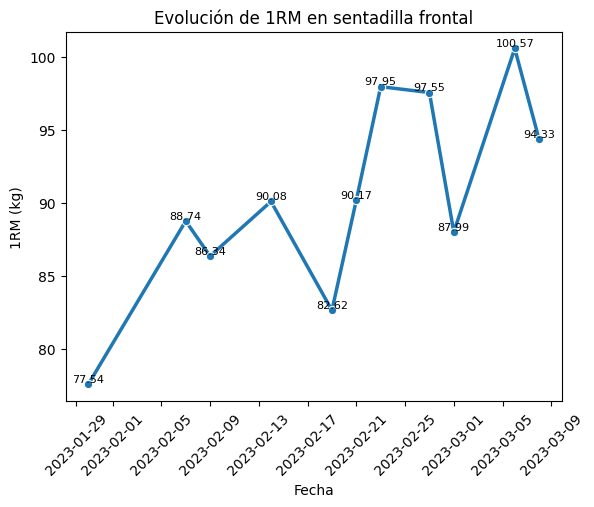

In [3]:
df_fecha_maxRM = df1.groupby("Fecha")["1RM (kg)"].max().reset_index()
sns.lineplot(data = df_fecha_maxRM, x = "Fecha", y = "1RM (kg)", linewidth= 2.5, marker= "o")
for i in range(len(df_fecha_maxRM["1RM (kg)"])):
    plt.annotate(df_fecha_maxRM["1RM (kg)"][i], (df_fecha_maxRM["Fecha"][i], df_fecha_maxRM["1RM (kg)"][i]), ha= "center", va= "bottom", fontsize= 8)
plt.title("Evolución de 1RM en sentadilla frontal")
plt.xticks(rotation= 45)
plt.show()

La segunda gráfica que quiero obtener es ver cómo ha evolucionado la intensidad y el volumen a lo largo del programa

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8400\2058045570.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels([datetime.datetime.strftime(date, "%d-%m-%Y") for date in df_sumreps_VMPmax_fecha["Fecha"]], rotation=45)


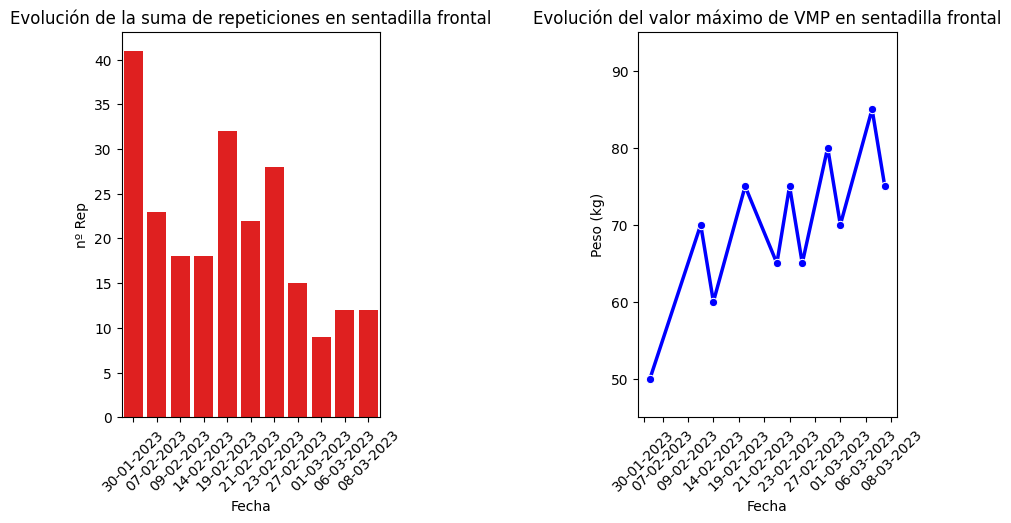

In [4]:
df_sumreps_VMPmax_fecha = df1.groupby("Fecha").agg({"nº Rep" : "sum", "Peso (kg)": "max"}).reset_index()
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(wspace=1)
sns.set_palette("Set2")
sns.barplot(data=df_sumreps_VMPmax_fecha, x="Fecha", y="nº Rep", color="red", ax=ax[0])
ax[0].set_xticklabels([datetime.datetime.strftime(date, "%d-%m-%Y") for date in df_sumreps_VMPmax_fecha["Fecha"]], rotation=45)
ax[0].set_title("Evolución de la suma de repeticiones en sentadilla frontal")
sns.lineplot(data=df_sumreps_VMPmax_fecha, x="Fecha", y="Peso (kg)", color="blue", ax=ax[1], marker="o", linewidth=2.5)
ax[1].set_xticklabels([datetime.datetime.strftime(date, "%d-%m-%Y") for date in df_sumreps_VMPmax_fecha["Fecha"]], rotation=45)
ax[1].set_title("Evolución del valor máximo de VMP en sentadilla frontal")
ax[1].set_ylim(45,95)
plt.show()



Graficar tabla de fatiga generada a lo largo de los entrenos que está situada en la Sheet2

In [5]:
df2.drop(columns=["Unnamed: 0"], inplace=True)
df2["Porcentaje de fatiga"] = df2["Porcentaje de fatiga"].astype("int64")
df2

,Fecha,Porcentaje de fatiga
0,2023-01-30,13
1,2023-02-07,12
2,2023-02-09,20
3,2023-02-14,17
4,2023-02-19,6
5,2023-02-21,18
6,2023-02-23,18
7,2023-02-27,14
8,2023-03-01,16
9,2023-03-06,21


C:\Users\Usuario\AppData\Local\Temp\ipykernel_8400\1453989996.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([datetime.datetime.strftime(date, "%d-%m-%Y") for date in df2["Fecha"]], rotation=45)


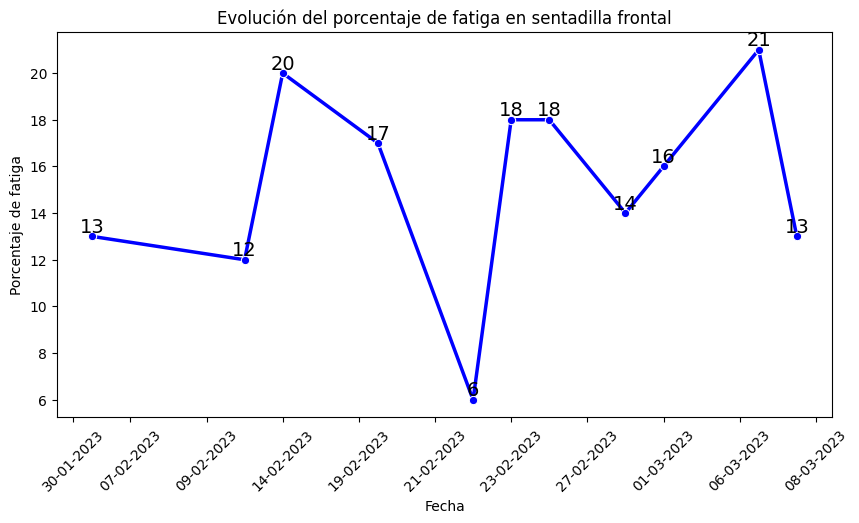

In [6]:
df2
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=df2, x="Fecha", y="Porcentaje de fatiga", color="blue", marker="o", linewidth=2.5)
plt.xticks(rotation=45)
ax.set_xticklabels([datetime.datetime.strftime(date, "%d-%m-%Y") for date in df2["Fecha"]], rotation=45)
for i in range(len(df2["Porcentaje de fatiga"])):
    plt.annotate(df2["Porcentaje de fatiga"][i], (df2["Fecha"][i], df2["Porcentaje de fatiga"][i]), ha= "center", va= "bottom", fontsize= 14)
plt.title("Evolución del porcentaje de fatiga en sentadilla frontal")
plt.show()

Graficar tabla de VMP max con máximo peso por fecha que está en la Sheet3

In [7]:
df3.drop(columns=["Unnamed: 0"], inplace=True)


In [8]:
df3

,Ejercicio,Fecha,Peso (kg),VMP (m/s)
0,SENTADILLA FRONTAL,2023-01-30,50,0.91
1,SENTADILLA FRONTAL,2023-02-07,70,0.68
2,SENTADILLA FRONTAL,2023-02-09,60,0.83
3,SENTADILLA FRONTAL,2023-02-14,75,0.61
4,SENTADILLA FRONTAL,2023-02-19,65,0.62
5,SENTADILLA FRONTAL,2023-02-21,75,0.59
6,SENTADILLA FRONTAL,2023-02-23,65,0.88
7,SENTADILLA FRONTAL,2023-02-27,80,0.63
8,SENTADILLA FRONTAL,2023-03-01,70,0.62
9,SENTADILLA FRONTAL,2023-03-06,85,0.59


In [9]:
df_peso_VMP = df3.groupby("Peso (kg)")["VMP (m/s)"]


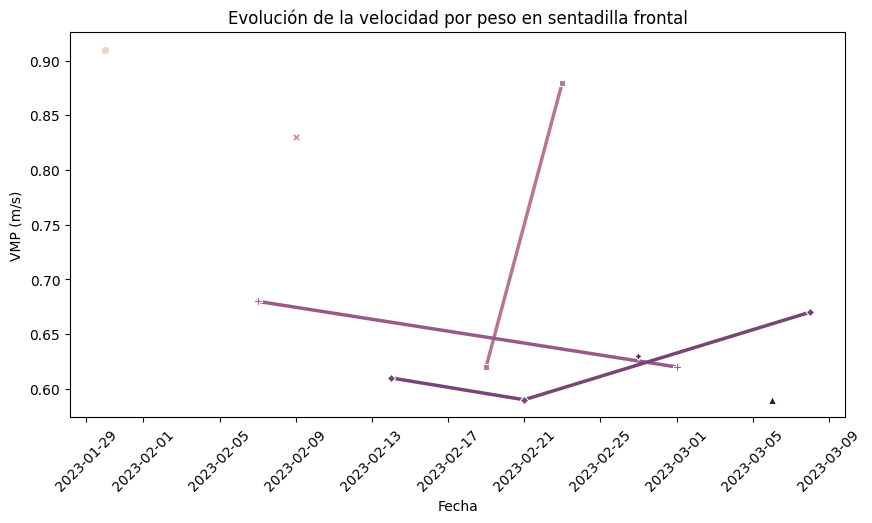

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=df3, x="Fecha", y="VMP (m/s)", style="Peso (kg)", hue="Peso (kg)", markers=True, dashes=False, linewidth=2.5, legend= False)
plt.xticks(rotation=45)
for i in range(len(df3["Peso (kg)"])):
    plt.annotate(df3["Peso (kg)"][i], (df3["Fecha"][i], df3["Peso (kg)"][i]), ha= "center", va= "bottom", fontsize= 14)
plt.title("Evolución de la velocidad por peso en sentadilla frontal")
plt.show()